# Degree distributions between subjects and controls
## FC, ISC, FISC separately

In [145]:
import pymnet as pn
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [73]:
with open('/m/cs/scratch/networks/trianaa1/Paper2/multilayer/results/multilayer_net','rb') as f:
    M = pickle.load(f)

In [138]:
M

In [139]:
print('Nodes: ',len(list(M.iter_nodes())))
print('Layers: ',len(list(M.iter_layers())))
print('Nodelayers: ',len(list(M.iter_node_layers())))
print('Edges: ',len(M.edges))
print('Aspects: ',M.aspects)

Nodes:  65
Layers:  14
Nodelayers:  910
Edges:  63834
Aspects:  1


In [140]:
print(list(M.iter_layers()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [141]:
print(list(M.iter_nodes()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [142]:
subjects = list(range(0,36))
controls = list(range(36,65))

In [143]:
# get deg distributions, assumes nodes are subjects and layers are ROIs
def get_deg_distributions(M):
    fc,isc,fisc = [],[],[]
    for nl in M.iter_node_layers():
        fc_curr,isc_curr,fisc_curr = 0,0,0
        for neighbor in M[nl]:
            if nl[1] == neighbor[1]: # same layer, ISC
                isc_curr += 1
            elif nl[0] == neighbor[0]: # same node, diff layer, FC
                fc_curr += 1
            else: # diff layer, diff node, FISC
                fisc_curr += 1
        fc.append(fc_curr)
        isc.append(isc_curr)
        fisc.append(fisc_curr)
    return fc,isc,fisc
# subject deg distrbutions
sub_fc, sub_isc, sub_fisc = get_deg_distributions(pn.subnet(M,subjects,M.iter_layers()))
# control deg distributions
c_fc, c_isc, c_fisc = get_deg_distributions(pn.subnet(M,controls,M.iter_layers()))

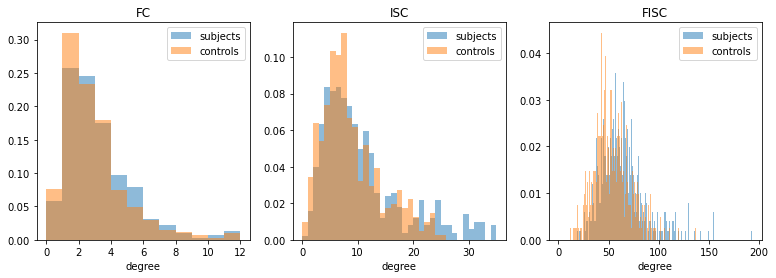

In [144]:
def plot_subj_c(sub,c,ax,labels,title,xlabel='degree'):
    bins = range(0,max(max(sub),max(c))+1)
    ax.hist(sub,bins=bins,label=labels[0],alpha=0.5,density=True); ax.hist(c,bins=bins,label=labels[1],alpha=0.5,density=True); ax.legend()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
labels = ('subjects','controls')
plot_subj_c(sub_fc,c_fc,axs[0],labels,'FC')
plot_subj_c(sub_isc,c_isc,axs[1],labels,'ISC')
plot_subj_c(sub_fisc,c_fisc,axs[2],labels,'FISC')

### Statistical tests

In [162]:
# Welch's t-test for equal means
welch_p_fc = scipy.stats.ttest_ind(sub_fc,c_fc,equal_var=False)
welch_p_isc = scipy.stats.ttest_ind(sub_isc,c_isc,equal_var=False)
welch_p_fisc = scipy.stats.ttest_ind(sub_isc,c_isc,equal_var=False)
print('FC: p = ',welch_p_fc[1])
print('ISC: p = ',welch_p_isc[1])
print('FISC: p = ',welch_p_fisc[1])

FC: p =  0.026954409818986266
ISC: p =  2.493451990391342e-06
FISC: p =  2.493451990391342e-06


In [163]:
# Kolmogorov-Smirnov test for having been drawn from the same distribution
ks_p_fc = scipy.stats.kstest(sub_fc,c_fc)
ks_p_isc = scipy.stats.kstest(sub_isc,c_isc)
ks_p_fisc = scipy.stats.kstest(sub_fisc,c_fisc)
print('FC: p = ',ks_p_fc[1])
print('ISC: p = ',ks_p_isc[1])
print('FISC: p = ',ks_p_fisc[1])

FC: p =  0.19227957338034918
ISC: p =  0.009807402799200338
FISC: p =  9.044265336655144e-11
